In [ ]:
!wget --no-check-certificate https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv

--2024-06-21 11:05:25--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 3.162.7.188, 3.162.7.94, 3.162.7.58, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|3.162.7.188|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘bike_sharing.csv.1’

bike_sharing.csv.1  100%[===================>] 633.16K  --.-KB/s    in 0.09s   

2024-06-21 11:05:25 (6.91 MB/s) - ‘bike_sharing.csv.1’ saved [648353/648353]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('bike_sharing.csv')

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df['datetime']=pd.to_datetime(df['datetime'])

In [ ]:
df['datetime'].dtype

dtype('<M8[ns]')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [ ]:
df['date']=df['datetime'].dt.date

In [ ]:
df['date'].min(),df['date'].max()

(datetime.date(2011, 1, 1), datetime.date(2012, 12, 19))

In [ ]:
df['date'].nunique()

456

In [ ]:
df1=df.drop_duplicates(subset='date')

In [ ]:
df1['season'].value_counts()

season
1    114
2    114
3    114
4    114
Name: count, dtype: int64

In [ ]:
df1['workingday'].value_counts()

workingday
1    311
0    145
Name: count, dtype: int64

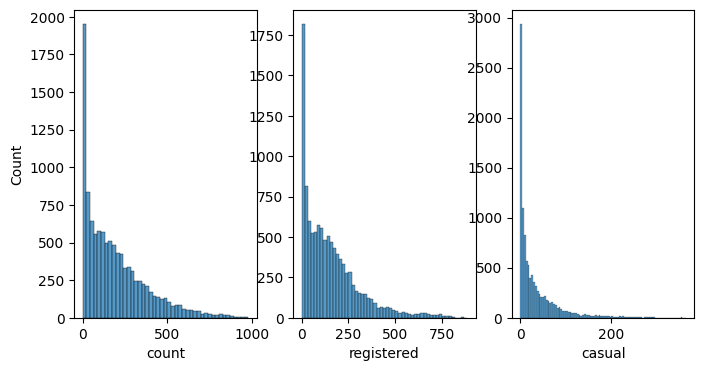

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(1,3,1)
sns.histplot(df['count'])
ax=plt.subplot(1,3,2)
sns.histplot(df['registered'],ax=ax)
ax.set(ylabel='')
ax=plt.subplot(1,3,3)
sns.histplot(df['casual'],ax=ax)
ax.set(ylabel='')
plt.show()

In [ ]:
df1=df.groupby(['date','season','holiday','workingday']).aggregate({'casual':sum,'registered':sum,'count':sum})
#grouped by date, retaining the data about season, holiday and workingday columns and sum of hiring counts
df1.reset_index(inplace=True) #reseting the index from date and multilevel column indexing

KeyError: 'date'

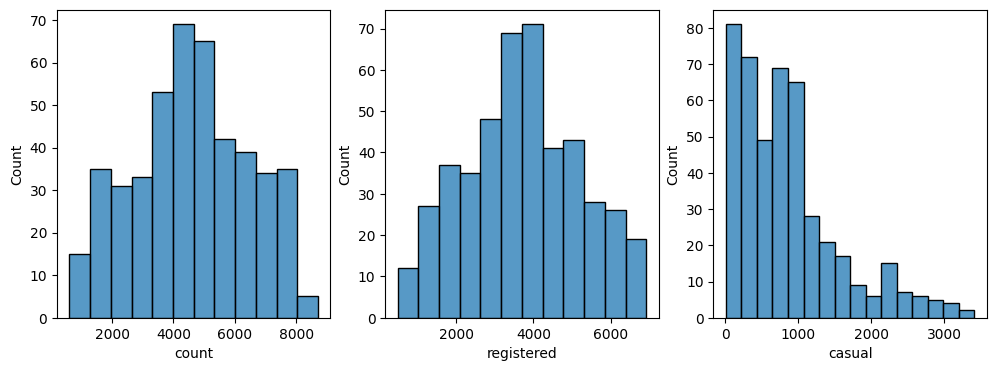

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(df1['count'])
plt.subplot(1,3,2)
sns.histplot(df1['registered'])
plt.subplot(1,3,3)
sns.histplot(df1['casual'])
plt.show()

<Axes: ylabel='casual'>

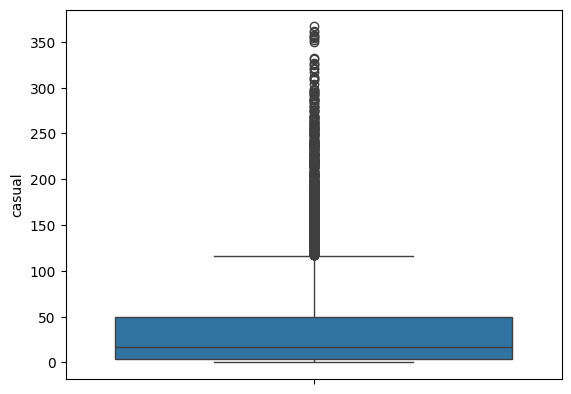

In [ ]:
sns.boxplot(data=df, y='casual')

In [ ]:
#converting season codes to season names
def season (s):
  if(s==1):
    return 'spring'
  elif(s==2):
    return 'summer'
  elif(s==3):
    return 'fall'
  else:
    return 'winter'
df['seasonw']=df['season'].apply(season)

In [ ]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,seasonw
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,spring
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,spring
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,spring
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,spring
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,winter
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,winter
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,winter
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,winter


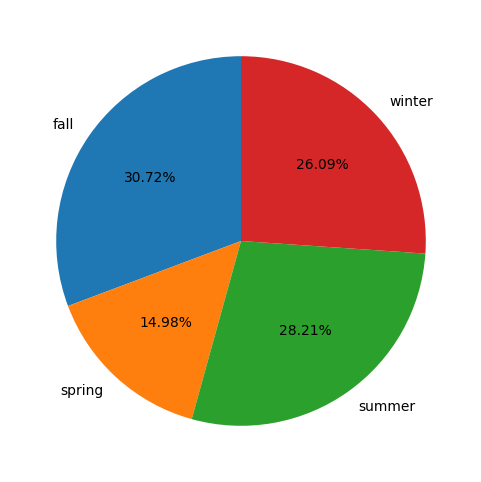

In [ ]:
season_count=df.groupby('seasonw')['count'].sum()
plt.figure(figsize = (6,6))
plt.pie(season_count,
       labels=season_count.index,
       startangle=90,
       autopct = '%.2f%%')
plt.show()

In [ ]:
season_count

seasonw
fall      640662
spring    312498
summer    588282
winter    544034
Name: count, dtype: int64

<Axes: xlabel='seasonw', ylabel='count'>

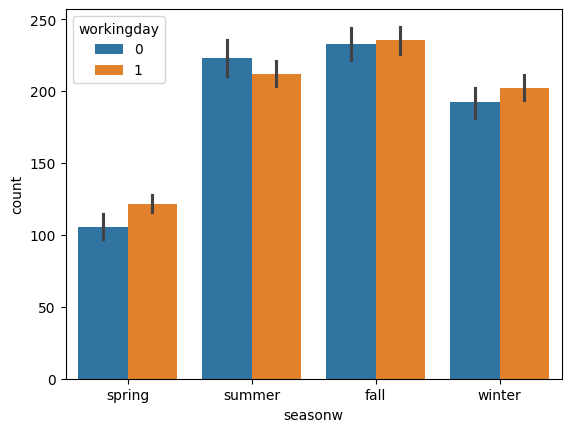

In [ ]:
sns.barplot(data=df,x='seasonw',y='count',hue='workingday',estimator='mean')

<Axes: xlabel='weather', ylabel='count'>

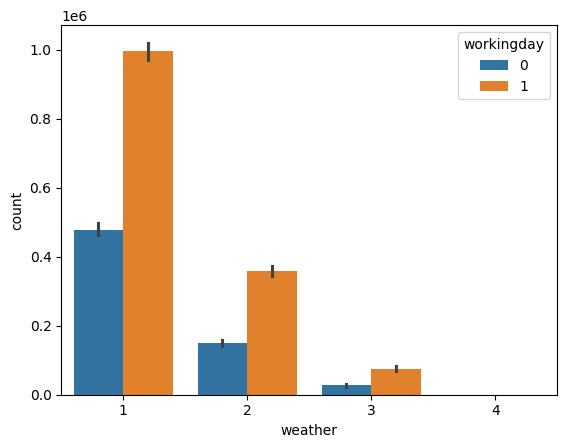

In [ ]:
sns.barplot(x='weather',hue='workingday',y='count',data=df,estimator='sum')

<ipython-input-14-eb3eda238735>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:g'` for the same effect.

  sns.countplot(hue='season',x='weather',data=df,color='g')


<Axes: xlabel='weather', ylabel='count'>

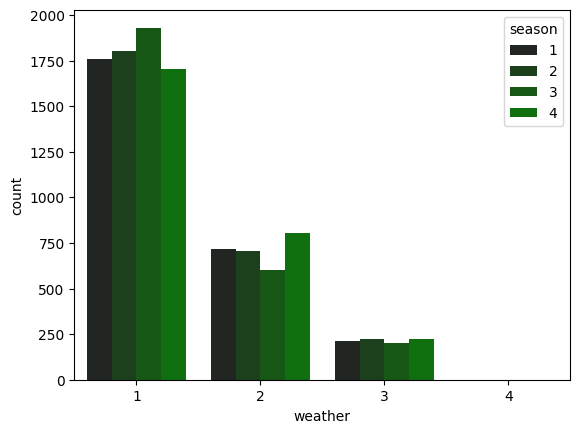

In [ ]:
sns.countplot(hue='season',x='weather',data=df,color='g')

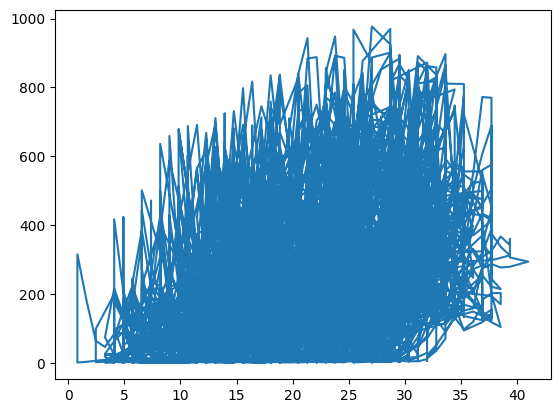

In [ ]:
plt.plot(df['temp'],df['count'])

<Axes: xlabel='workingday', ylabel='count'>

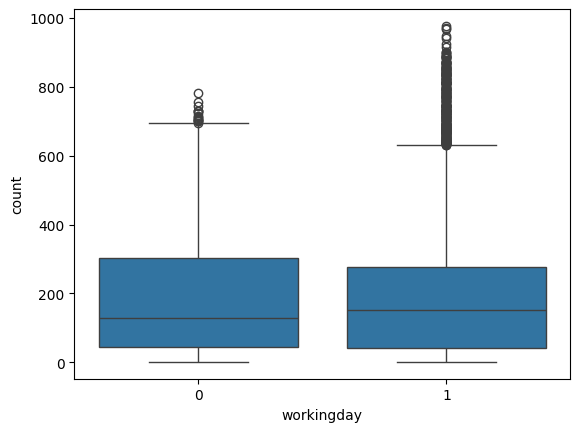

In [ ]:
sns.boxplot(data=df,x='workingday',y='count')

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
df1=df.groupby(['date','seasonw','holiday','workingday']).aggregate({'casual':sum,'registered':sum,'count':sum})
#grouped by date, retaining the data about season, holiday and workingday columns and sum of hiring counts
df1.reset_index(inplace=True) #reseting the index from date and multilevel column indexing

In [ ]:
df1

,date,season,holiday,workingday,casual,registered,count
0,2011-01-01,1,0,0,331,654,985
1,2011-01-02,1,0,0,131,670,801
2,2011-01-03,1,0,1,120,1229,1349
3,2011-01-04,1,0,1,108,1454,1562
4,2011-01-05,1,0,1,82,1518,1600
...,...,...,...,...,...,...,...
451,2012-12-15,4,0,0,767,4280,5047
452,2012-12-16,4,0,0,538,3248,3786
453,2012-12-17,4,0,1,212,4373,4585
454,2012-12-18,4,0,1,433,5124,5557


In [ ]:
#the data of working and non working days has been seggregated
df_working=df1[df1['workingday']==1]
df_nonworking=df1[df1['workingday']==0]

In [ ]:
df_working['count'].mean(),df_nonworking['count'].mean()

(4600.012861736334, 4516.358620689655)

In [ ]:
ttest_ind(df_working['count'],df_nonworking['count'])

TtestResult(statistic=0.44477221614881995, pvalue=0.656696335987859, df=454.0)

<Axes: xlabel='count', ylabel='Count'>

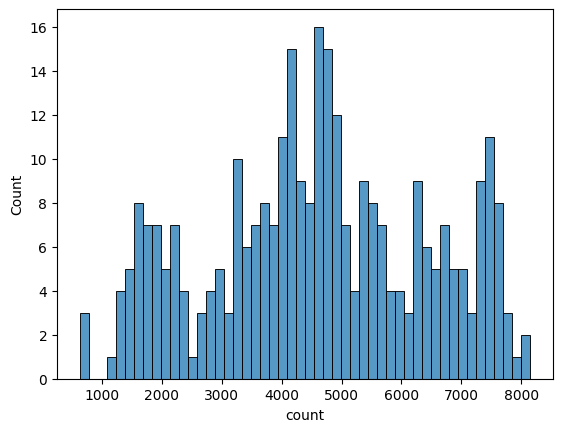

In [ ]:
sns.histplot(df_working['count'],bins=50)

<Axes: xlabel='count', ylabel='Count'>

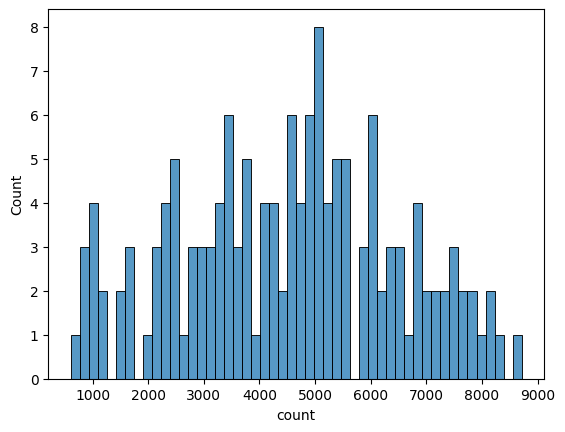

In [ ]:
sns.histplot(df_nonworking['count'],bins=50)

In [ ]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,seasonw,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,spring,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,spring,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,spring,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,spring,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,spring,2011-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,winter,2012-12-19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,winter,2012-12-19
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,winter,2012-12-19
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,winter,2012-12-19


In [ ]:
#segregating the count based on weather
df_weather1=df[df['weather']==1]
df_weather2=df[df['weather']==2]
df_weather3=df[df['weather']==3]
df_weather4=df[df['weather']==4]

In [ ]:
#Assumptions in ANOVA
from statsmodels.graphics.gofplots import qqplot

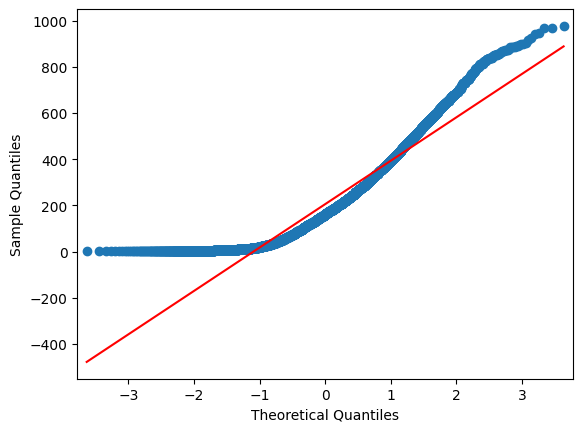

<Figure size 800x300 with 0 Axes>

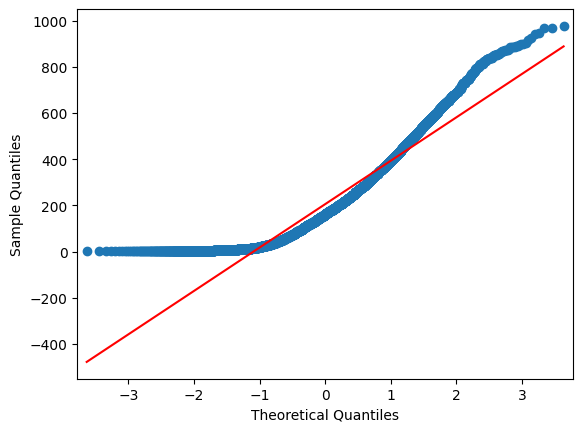

In [ ]:
plt.figure(figsize=(8,3))
qqplot(df_weather1['count'],line='s')


In [ ]:
from scipy.stats import shapiro

In [ ]:
countsub=df_weather1['count'].sample(200)
shapiro(countsub)

ShapiroResult(statistic=0.8852612376213074, pvalue=3.1881906836783713e-11)

In [ ]:
countsub2=df_weather2['count'].sample(200)
shapiro(countsub2)

ShapiroResult(statistic=0.8723453283309937, pvalue=6.005850764628784e-12)

In [ ]:
countsub3=df_weather3['count'].sample(200)
shapiro(countsub3)

ShapiroResult(statistic=0.7585265040397644, pvalue=8.141081148500356e-17)

In [ ]:
shapiro(df_weather4['count'])

ValueError: Data must be at least length 3.

In [ ]:
from scipy.stats import levene


In [ ]:
levene(df_weather1['count'],df_weather2['count'],df_weather3['count'],df_weather4['count'])

LeveneResult(statistic=54.85106195954556, pvalue=3.504937946833238e-35)

In [ ]:
from scipy.stats import f_oneway

In [ ]:
f_oneway(df_weather1['count'],df_weather2['count'],df_weather3['count'],df_weather4['count'])

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

In [ ]:
from scipy.stats import kruskal

In [ ]:
kruskal(df_weather1['count'],df_weather2['count'],df_weather3['count'],df_weather4['count'])

KruskalResult(statistic=205.00216514479087, pvalue=3.501611300708679e-44)

In [ ]:
#segregating the count based on seasons
df_spring=df1[df1['seasonw']=='spring']
df_summer=df1[df1['seasonw']=='summer']
df_fall=df1[df1['seasonw']=='fall']
df_winter=df1[df1['seasonw']=='winter']


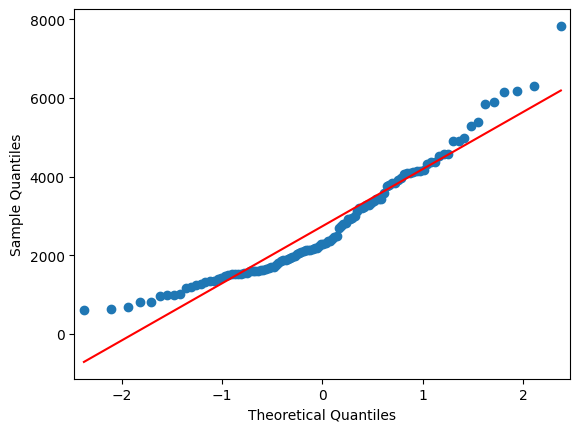

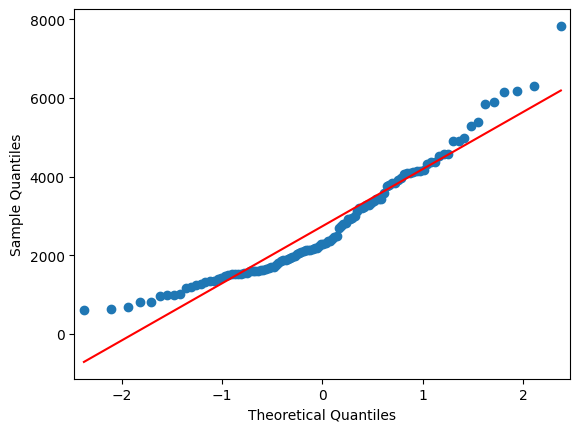

In [ ]:
#Assumptions in ANOVA
from statsmodels.graphics.gofplots import qqplot
qqplot(df_spring['count'],line='s')

In [ ]:
from scipy.stats import shapiro
sub1=df_spring['count'].sample(200)
shapiro(sub1)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [ ]:
shapiro(df_summer['count'])

ShapiroResult(statistic=0.9752597212791443, pvalue=0.032791439443826675)

In [ ]:
shapiro(df_fall['count'])

ShapiroResult(statistic=0.9641115069389343, pvalue=0.003765953006222844)

In [ ]:
shapiro(df_winter['count'])

ShapiroResult(statistic=0.9835520386695862, pvalue=0.17639805376529694)

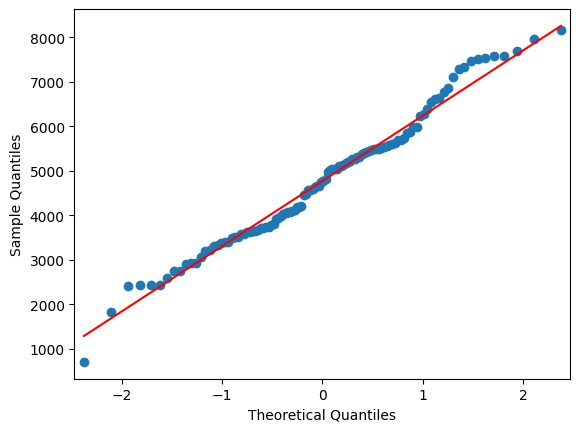

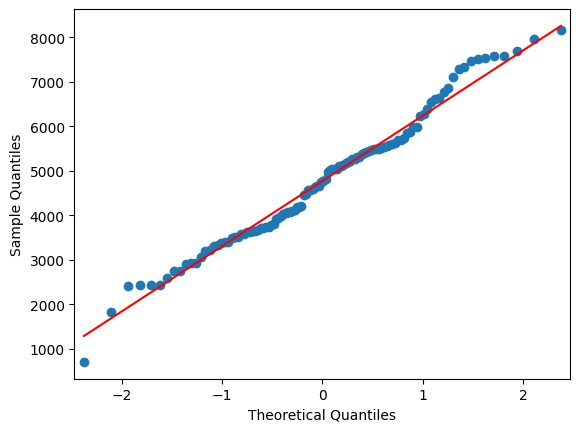

In [ ]:
qqplot(df_winter['count'],line='s')

In [ ]:
from scipy.stats import levene
levene(df_spring['count'],df_summer['count'],df_fall['count'],df_winter['count'])

LeveneResult(statistic=1.5071252673249398, pvalue=0.21194448921499898)

In [ ]:
from scipy.stats import f_oneway
f_oneway(df_spring['count'],df_summer['count'],df_fall['count'],df_winter['count'])

F_onewayResult(statistic=80.0504789788067, pvalue=1.506580502991204e-41)

In [ ]:
kruskal(df_spring['count'],df_summer['count'],df_fall['count'],df_winter['count'])

KruskalResult(statistic=152.13785107938023, pvalue=9.111105591373848e-33)

In [ ]:
from scipy.stats import kruskal
kruskal(df_spring['count'],df_summer['count'],df_fall['count'],df_winter['count'])

KruskalResult(statistic=152.13785107938023, pvalue=9.111105591373848e-33)

In [ ]:
#segregating the weather details based on season
spring=df[df['seasonw']=='spring']['weather']
summer=df[df['seasonw']=='summer']['weather']
fall=df[df['seasonw']=='fall']['weather']
winter=df[df['seasonw']=='winter']['weather']

In [ ]:
from scipy.stats import chisquare

In [ ]:
pd.crosstab(index=df['seasonw'],columns=df['weather'])

weather,1,2,3,4
seasonw,,,,
fall,1930,604,199,0
spring,1759,715,211,1
summer,1801,708,224,0
winter,1702,807,225,0


In [ ]:
chisquare(pd.crosstab(index=df['seasonw'],columns=df['weather']))

Power_divergenceResult(statistic=array([15.66740823, 29.16725476,  2.10826542,  3.        ]), pvalue=array([1.32664927e-03, 2.06532807e-06, 5.50242422e-01, 3.91625176e-01]))

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
chi2_contingency(pd.crosstab(index=df['seasonw'],columns=df['weather']))

Chi2ContingencyResult(statistic=49.15865559689363, pvalue=1.5499250736864862e-07, dof=9, expected_freq=array([[1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]]))